| **Inicio** | **atrás 2** | **Siguiente 4** |
|----------- |-------------- |---------------|
| [🏠](../../README.md) | [⏪](./2_Teorema_del_Limite_Central.ipynb)| [⏩](./4_Distribucion_Normal.ipynb)|

# **3. Potencializa la utilidad de tus datos con BootStrapping usando Python**

## **Introducción**

El Bootstrapping es una técnica de remuestreo estadístico que nos permite potenciar la utilidad de nuestros datos al obtener estimaciones robustas y realizar inferencias precisas sobre los parámetros poblacionales. Esta técnica es particularmente útil cuando no tenemos acceso a una población completa o cuando las muestras son pequeñas.

**¿Cómo funciona el Bootstrapping?**

El Bootstrapping se basa en el principio de que una muestra es una representación aproximada de la población. Para obtener una idea más precisa de la variabilidad de los estadísticos muestrales (como la media, la mediana, la desviación estándar, entre otros) y de las incertidumbres asociadas, podemos crear múltiples muestras artificiales (con reemplazo) de nuestra muestra original.

**Pasos para realizar Bootstrapping:**

1. Tomar una muestra de tamaño $n$ de nuestros datos originales.

2. Realizar una selección aleatoria con reemplazo a partir de la muestra original para crear una nueva muestra artificial del mismo tamaño.

3. Calcular el estadístico de interés (por ejemplo, la media) para la nueva muestra artificial.

4. Repetir los pasos 2 y 3 un gran número de veces (por ejemplo, 1000 o 10,000 veces) para obtener una distribución de los estadísticos muestrales.

5. Utilizar esta distribución para obtener estimaciones de intervalos de confianza y realizar pruebas de hipótesis sobre el parámetro de interés.

**Ejemplo práctico: Bootstrapping en Python**

Supongamos que tenemos una muestra de 30 observaciones de una población y queremos estimar el intervalo de confianza para la media de la población utilizando Bootstrapping.

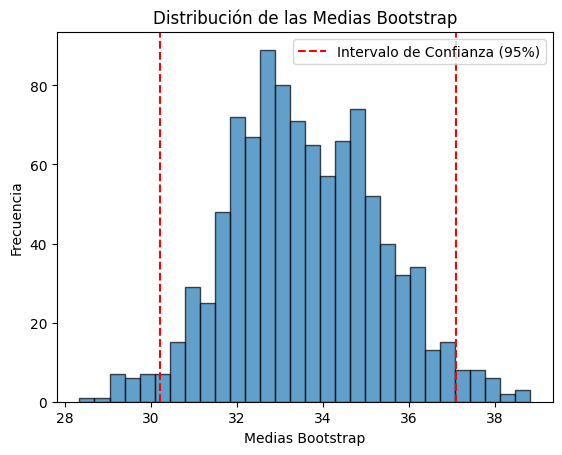

Intervalo de Confianza del 95% para la Media: [30.20, 37.10]


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Datos de ejemplo
datos = np.array([23, 32, 17, 45, 21, 56, 34, 38, 29, 41, 31, 19, 25, 47, 36, 40, 27, 39, 30, 43, 28, 22, 37, 33, 42, 20, 44, 26, 35, 46])

# Tamaño de la muestra original
tamano_muestra = len(datos)

# Número de repeticiones Bootstrap
num_bootstrap = 1000

# Lista para almacenar las medias de las muestras artificiales
medias_bootstrap = []

# Realizar Bootstrapping
for _ in range(num_bootstrap):
    muestra_bootstrap = np.random.choice(datos, size=tamano_muestra, replace=True)
    media_muestra_bootstrap = np.mean(muestra_bootstrap)
    medias_bootstrap.append(media_muestra_bootstrap)

# Calcular el intervalo de confianza del 95%
intervalo_confianza = np.percentile(medias_bootstrap, [2.5, 97.5])

# Crear histograma de las medias Bootstrap
plt.hist(medias_bootstrap, bins=30, edgecolor='black', alpha=0.7)
plt.axvline(intervalo_confianza[0], color='red', linestyle='--', label='Intervalo de Confianza (95%)')
plt.axvline(intervalo_confianza[1], color='red', linestyle='--')
plt.xlabel('Medias Bootstrap')
plt.ylabel('Frecuencia')
plt.title('Distribución de las Medias Bootstrap')

# Cambiar la ubicación de la leyenda a "upper right"
plt.legend(loc="upper right")

plt.show()

print(f"Intervalo de Confianza del 95% para la Media: [{intervalo_confianza[0]:.2f}, {intervalo_confianza[1]:.2f}]")

**Explicación detallada del ejemplo:**

1. Importamos las bibliotecas NumPy y Matplotlib para trabajar con datos y crear gráficas, respectivamente.

2. Definimos nuestros datos de ejemplo en forma de un arreglo NumPy (`datos`).

3. Definimos el tamaño de la muestra original (`tamano_muestra`) y el número de repeticiones Bootstrap (`num_bootstrap`).

4. Creamos una lista (`medias_bootstrap`) para almacenar las medias de las muestras artificiales.

5. Realizamos el Bootstrapping en un bucle `for`. En cada iteración, tomamos una muestra aleatoria con reemplazo de nuestros datos originales, calculamos la media para esta muestra artificial y la agregamos a la lista `medias_bootstrap`.

6. Calculamos el intervalo de confianza del 95% utilizando la función `np.percentile()`, que nos proporciona el percentil 2.5 y el percentil 97.5 de la distribución de las medias Bootstrap.

7. Creamos un histograma para visualizar la distribución de las medias Bootstrap

 y superponemos dos líneas verticales rojas para representar el intervalo de confianza del 95%.

8. Imprimimos el intervalo de confianza del 95% para la media poblacional.

**Resultados y Gráficas**

El histograma muestra la distribución de las medias Bootstrap obtenidas en los 1000 repeticiones. Observamos que la distribución se asemeja a una distribución normal. Las dos líneas verticales rojas representan el intervalo de confianza del 95% para la media poblacional.

El intervalo de confianza obtenido nos permite estimar con un 95% de confianza que la media poblacional está entre los valores impresos.

El Bootstrapping nos proporciona una herramienta poderosa para realizar inferencias y obtener estimaciones precisas sobre los parámetros poblacionales cuando no tenemos acceso a una población completa o cuando nuestras muestras son pequeñas.

## **Origen del término BootStrap**

El término "Bootstrap" en estadística tiene su origen en una analogía con la frase en inglés "to pull oneself up by one's bootstraps", que se traduce como "levantarse a sí mismo por las correas de las botas". La expresión hace referencia a la idea de realizar una acción aparentemente imposible o autogenerada.

El método Bootstrap fue introducido por Bradley Efron en 1979 como una técnica de remuestreo que permite obtener estimaciones precisas de los parámetros de una población basándose únicamente en la muestra observada. La analogía con las botas se debe a que el procedimiento utiliza datos de una muestra para "crear" muestras artificiales, lo que se asemeja a "levantarse a sí mismo" o generar información adicional de la muestra original.

En el Bootstrap, se toma la muestra observada como una representación aproximada de la población, y mediante la técnica de remuestreo con reemplazo, se crean múltiples muestras artificiales. Estas muestras artificiales son similares a levantar las correas de las botas para elevarse, es decir, obtener más información de los datos disponibles.

La idea clave detrás del Bootstrap es que, si la muestra es una buena representación de la población, entonces las muestras artificiales obtenidas de la muestra también reflejarán la variabilidad inherente de la población. De esta manera, el Bootstrap proporciona una forma eficiente de estimar la incertidumbre y construir intervalos de confianza sin necesidad de asumir distribuciones paramétricas o conocer la forma exacta de la población subyacente.

En resumen, el término "Bootstrap" en estadística se deriva de la expresión en inglés y se refiere a una técnica de remuestreo que permite obtener estimaciones robustas y realizar inferencias precisas a partir de una muestra utilizando muestras artificiales generadas a partir de la muestra original.

## **Para qué sirve**

El Bootstrap es una técnica poderosa y versátil que tiene varias aplicaciones en estadística y análisis de datos. A continuación, se presentan algunas de las principales utilidades del Bootstrap:

1. **Estimación de Parámetros Poblacionales:**

 El Bootstrap es especialmente útil cuando se trabaja con muestras pequeñas o cuando la distribución de los datos es desconocida. Permite estimar parámetros poblacionales, como la media, la mediana, la varianza, la proporción, entre otros, a partir de la muestra observada.

2. **Intervalos de Confianza:**

 El Bootstrap es una técnica no paramétrica que permite construir intervalos de confianza sin hacer suposiciones sobre la distribución subyacente de los datos. Estos intervalos proporcionan una medida de la incertidumbre en las estimaciones de los parámetros.

3. **Pruebas de Hipótesis:**

 El Bootstrap también se puede utilizar para realizar pruebas de hipótesis, donde se compara un estadístico de interés (por ejemplo, la diferencia entre dos medias) con una distribución Bootstrap bajo la hipótesis nula. Esto permite realizar pruebas de hipótesis de manera más flexible cuando no se cumplen los supuestos de las pruebas paramétricas tradicionales.

4. **Validación de Modelos:**

 En el contexto del aprendizaje automático, el Bootstrap puede utilizarse para realizar validación cruzada, una técnica para evaluar la calidad del ajuste de un modelo y prevenir el sobreajuste (overfitting) o subajuste (underfitting).

5. **Estimación de la Distribución de Estadísticos:**

 El Bootstrap puede utilizarse para obtener una aproximación de la distribución de estadísticos complejos o no estándar, que no siguen una distribución normal o conocida.

6. **Análisis de Sensibilidad:**

 El Bootstrap permite evaluar la sensibilidad de los resultados a cambios en los datos, como la inclusión o exclusión de observaciones atípicas.

7. **Estimación de la Precisión de Muestreo:**

 El Bootstrap proporciona una forma práctica de estimar la precisión de muestreo y la variabilidad de los resultados.

8. **Estimación de Medianas, Cuantiles y Percentiles:**

 El Bootstrap es especialmente útil para estimar medianas, cuantiles y percentiles de distribuciones, ya que no requiere asumir que los datos siguen una distribución específica.

En resumen, el Bootstrap es una técnica valiosa para obtener estimaciones precisas y realizar inferencias estadísticas robustas sin hacer suposiciones sobre la distribución subyacente de los datos. Su utilidad se extiende a diversas áreas de la estadística, el análisis de datos y el aprendizaje automático, y es una herramienta esencial en el arsenal de cualquier científico de datos o investigador.

## **Contexto y datos de ejemplo**

Para proporcionar un ejemplo concreto del uso del Bootstrap, vamos a crear un escenario hipotético y utilizar datos de muestra simulados para ilustrar cómo se aplica esta técnica para estimar el intervalo de confianza de la media de una población.

**Contexto:**

Supongamos que tenemos una empresa que fabrica baterías para dispositivos electrónicos. La empresa quiere estimar la duración promedio de las baterías que fabrica. Para ello, se toma una muestra de 30 baterías y se mide la duración (en horas) de cada una.

**Datos de ejemplo:**

A continuación, se presentan los datos de muestra simulados (duración en horas de 30 baterías):

In [2]:
import numpy as np

# Datos de muestra simulados
datos_muestra = np.array([28, 30, 31, 29, 32, 33, 30, 28, 31, 34, 29, 31, 30, 32, 29, 28, 31, 33, 30, 32, 30, 29, 31, 30, 32, 29, 30, 32, 31, 33])

**Aplicación del Bootstrap:**

Vamos a utilizar el Bootstrap para estimar el intervalo de confianza del 95% para la media de la duración de las baterías.


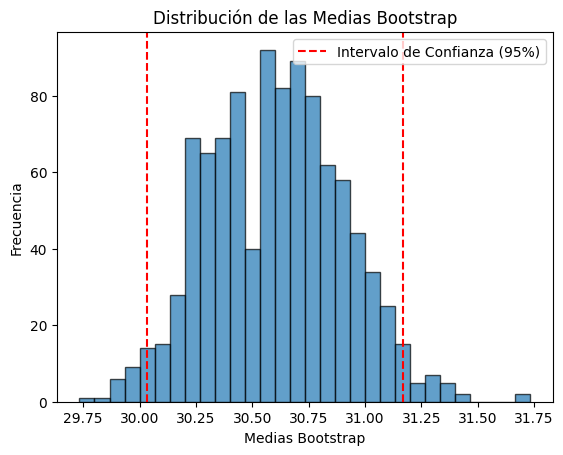

Intervalo de Confianza del 95% para la Media: [30.03, 31.17]


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Datos de muestra simulados
datos_muestra = np.array([28, 30, 31, 29, 32, 33, 30, 28, 31, 34, 29, 31, 30, 32, 29, 28, 31, 33, 30, 32, 30, 29, 31, 30, 32, 29, 30, 32, 31, 33])

# Tamaño de la muestra
tamano_muestra = len(datos_muestra)

# Número de repeticiones Bootstrap
num_bootstrap = 1000

# Lista para almacenar las medias de las muestras Bootstrap
medias_bootstrap = []

# Realizar Bootstrapping
for _ in range(num_bootstrap):
    muestra_bootstrap = np.random.choice(datos_muestra, size=tamano_muestra, replace=True)
    media_muestra_bootstrap = np.mean(muestra_bootstrap)
    medias_bootstrap.append(media_muestra_bootstrap)

# Calcular el intervalo de confianza del 95%
intervalo_confianza = np.percentile(medias_bootstrap, [2.5, 97.5])

# Crear histograma de las medias Bootstrap
plt.hist(medias_bootstrap, bins=30, edgecolor='black', alpha=0.7)
plt.axvline(intervalo_confianza[0], color='red', linestyle='--', label='Intervalo de Confianza (95%)')
plt.axvline(intervalo_confianza[1], color='red', linestyle='--')
plt.xlabel('Medias Bootstrap')
plt.ylabel('Frecuencia')
plt.title('Distribución de las Medias Bootstrap')
plt.legend()
plt.show()

print(f"Intervalo de Confianza del 95% para la Media: [{intervalo_confianza[0]:.2f}, {intervalo_confianza[1]:.2f}]")

**Explicación del ejemplo:**

En este ejemplo, utilizamos la biblioteca NumPy para generar datos simulados de una muestra de 30 baterías y calcular la duración (en horas) de cada una. Luego, aplicamos el Bootstrap para obtener una distribución de las medias muestrales (duración promedio) a partir de la muestra original.

En el gráfico, se muestra la distribución de las medias Bootstrap generadas mediante un histograma. Además, se dibujan dos líneas verticales rojas que representan el intervalo de confianza del 95% para la media poblacional de duración de las baterías.

Finalmente, se imprime el intervalo de confianza del 95% para la media de duración de las baterías, lo que nos permite estimar con un 95% de confianza que la duración promedio de las baterías está entre los valores impresos.

Es importante tener en cuenta que, en un escenario real, los datos de muestra se obtendrían de observaciones reales y no estarían simulados. El ejemplo anterior se proporciona con fines ilustrativos para demostrar cómo se aplica el Bootstrap para obtener intervalos de confianza de la media en una situación hipotética.

## **Cómo funciona Bootstrap**

El método Bootstrap es una técnica de remuestreo que se utiliza para estimar la distribución de un estadístico muestral o para realizar inferencias sobre parámetros poblacionales. Su funcionamiento se puede describir en los siguientes pasos:

1. **Paso 1: Obtención de la Muestra:**

Se inicia con una muestra original de datos observados, que se considera una aproximación de la población de interés.

2. **Paso 2: Generación de Muestras Artificiales (Bootstrap):**

A partir de la muestra original, se generan múltiples muestras artificiales (con reemplazo). Cada muestra artificial tiene el mismo tamaño que la muestra original, pero como se realiza con reemplazo, algunos datos pueden repetirse en la muestra artificial, y otros pueden no ser incluidos.

3. **Paso 3: Cálculo del Estadístico de Interés:**

Para cada muestra artificial, se calcula el estadístico de interés (por ejemplo, la media, la mediana, la desviación estándar) utilizando los datos de esa muestra.

4. **Paso 4: Construcción de la Distribución Bootstrap:**

Se crea una distribución de los estadísticos calculados a partir de las muestras artificiales. Esta distribución Bootstrap representa la variabilidad del estadístico muestral y proporciona una estimación de cómo se comportaría el estadístico si se tomaran múltiples muestras de la población original.

5. **Paso 5: Obtención de Intervalos de Confianza e Inferencias:**

A partir de la distribución Bootstrap, se pueden obtener intervalos de confianza para el estadístico de interés. Estos intervalos proporcionan una medida de la incertidumbre en la estimación del parámetro poblacional y nos permiten realizar inferencias estadísticas.

**Ejemplo:**

Supongamos que tenemos una muestra de 100 personas y queremos estimar la edad promedio de la población. Podemos aplicar Bootstrap de la siguiente manera:

1. Tomamos una muestra de 100 personas de la población original.

2. Generamos muestras artificiales (Bootstrap) a partir de la muestra original, con reemplazo. Por ejemplo, podemos obtener 1000 muestras artificiales, cada una con 100 personas seleccionadas al azar de la muestra original.

3. Calculamos la edad promedio para cada muestra artificial, lo que nos da una distribución de las edades promedio.

4. A partir de esta distribución, podemos obtener un intervalo de confianza del 95% para la edad promedio, que nos indicará el rango probable de valores en el que se encuentra la edad promedio de la población.

En resumen, el Bootstrap es una técnica poderosa que nos permite utilizar la muestra observada para estimar la distribución de los estadísticos y realizar inferencias sobre parámetros poblacionales, sin necesidad de hacer suposiciones sobre la distribución subyacente de los datos. Es especialmente útil cuando se trabaja con muestras pequeñas o cuando no se conocen las propiedades estadísticas de la población.

## **Intervalo de Confianza**

El intervalo de confianza es una medida estadística que proporciona un rango de valores dentro del cual es probable que se encuentre un parámetro poblacional desconocido, con un nivel de confianza determinado. En otras palabras, el intervalo de confianza nos indica el grado de incertidumbre asociado a una estimación y nos da una idea de qué tan precisos son nuestros resultados.

**Cómo se interpreta un Intervalo de Confianza:**

Por ejemplo, si se estima que la edad promedio de una población está entre 25 y 35 años con un intervalo de confianza del 95%, esto significa que si repitiéramos el proceso de obtención de muestras y cálculo del intervalo muchas veces, en aproximadamente el 95% de las veces, el verdadero valor de la edad promedio de la población estaría dentro de ese rango (25 a 35 años).

**Factores que afectan el Intervalo de Confianza:**

- **Tamaño de la muestra:**

 A medida que aumenta el tamaño de la muestra, el intervalo de confianza tiende a hacerse más estrecho, lo que indica mayor precisión en la estimación.

- **Nivel de confianza:**

 Un intervalo de confianza del 95% es más amplio que un intervalo de confianza del 90%, ya que se necesita mayor margen de error para tener un nivel de confianza más alto.

- **Desviación estándar de la muestra:**

 Si la desviación estándar de la muestra es mayor, el intervalo de confianza será más amplio, lo que indica mayor incertidumbre en la estimación.

- **Distribución de los datos:** La forma de la distribución de los datos también puede influir en el intervalo de confianza.

**Cómo calcular un Intervalo de Confianza:**

El cálculo de un intervalo de confianza depende del estadístico que se está estimando y del enfoque utilizado. Para el caso de la media, cuando la muestra es lo suficientemente grande, se puede utilizar la distribución normal o la distribución t de Student para calcular el intervalo de confianza.

Para el caso del Bootstrap (que mencionamos en la respuesta anterior), el intervalo de confianza se construye a partir de la distribución de los estadísticos generados a partir de las muestras artificiales.

Es importante tener en cuenta que el intervalo de confianza no proporciona una garantía de que el valor verdadero del parámetro esté dentro del intervalo particularmente en una muestra específica; en cambio, nos proporciona una probabilidad de que esto ocurra en el largo plazo, si se repite el proceso muchas veces.

En resumen, el intervalo de confianza es una medida esencial en la inferencia estadística, ya que nos permite cuantificar la incertidumbre en nuestras estimaciones y brinda una herramienta valiosa para tomar decisiones basadas en datos.

## **Bootstrap con Python: paso a paso**

Supongamos que tenemos una muestra de 30 observaciones de una variable aleatoria (por ejemplo, la duración de la batería de un dispositivo electrónico) y queremos estimar el intervalo de confianza del 95% para la media poblacional utilizando Bootstrap.

**Paso 1: Importar las bibliotecas necesarias**

In [4]:
import numpy as np
import matplotlib.pyplot as plt

**Paso 2: Definir los datos de la muestra**

In [5]:
datos_muestra = np.array([23, 32, 17, 45, 21, 56, 34, 38, 29, 41, 31, 19, 25, 47, 36, 40, 27, 39, 30, 43, 28, 22, 37, 33, 42, 20, 44, 26, 35, 46])

**Paso 3: Definir el tamaño de la muestra y el número de repeticiones Bootstrap**

In [6]:
tamano_muestra = len(datos_muestra)
num_bootstrap = 1000

**Paso 4: Realizar Bootstrap**

In [7]:
# Lista para almacenar las medias de las muestras Bootstrap
medias_bootstrap = []

# Realizar Bootstrapping
for _ in range(num_bootstrap):
    muestra_bootstrap = np.random.choice(datos_muestra, size=tamano_muestra, replace=True)
    media_muestra_bootstrap = np.mean(muestra_bootstrap)
    medias_bootstrap.append(media_muestra_bootstrap)

**Paso 5: Calcular el intervalo de confianza**

In [8]:
# Calcular el intervalo de confianza del 95%
intervalo_confianza = np.percentile(medias_bootstrap, [2.5, 97.5])

**Paso 6: Visualizar la distribución de las medias Bootstrap**

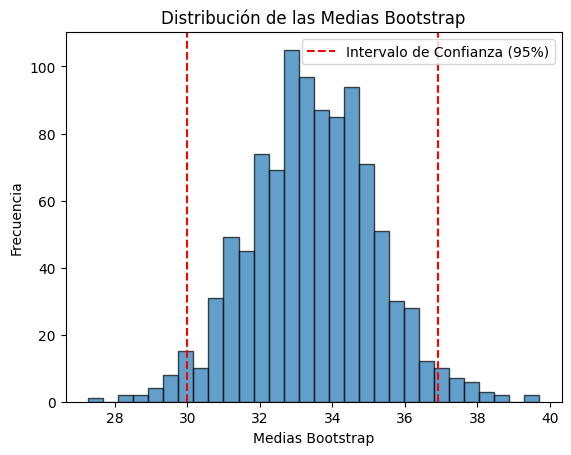

In [9]:
# Crear histograma de las medias Bootstrap
plt.hist(medias_bootstrap, bins=30, edgecolor='black', alpha=0.7)
plt.axvline(intervalo_confianza[0], color='red', linestyle='--', label='Intervalo de Confianza (95%)')
plt.axvline(intervalo_confianza[1], color='red', linestyle='--')
plt.xlabel('Medias Bootstrap')
plt.ylabel('Frecuencia')
plt.title('Distribución de las Medias Bootstrap')
plt.legend()
plt.show()

**Paso 7: Mostrar el resultado del intervalo de confianza**

In [10]:
print(f"Intervalo de Confianza del 95% para la Media: [{intervalo_confianza[0]:.2f}, {intervalo_confianza[1]:.2f}]")

Intervalo de Confianza del 95% para la Media: [30.00, 36.90]


**Explicación del ejemplo:**

1. Importamos las bibliotecas NumPy y Matplotlib para trabajar con datos y crear gráficas, respectivamente.

2. Definimos los datos de muestra (`datos_muestra`).

3. Obtenemos el tamaño de la muestra (`tamano_muestra`) y el número de repeticiones Bootstrap (`num_bootstrap`).

4. Creamos una lista (`medias_bootstrap`) para almacenar las medias de las muestras artificiales.

5. Realizamos el Bootstrap en un bucle for. En cada iteración, tomamos una muestra aleatoria con reemplazo de la muestra original, calculamos la media para esta muestra artificial y la agregamos a la lista `medias_bootstrap`.

6. Calculamos el intervalo de confianza del 95% utilizando la función `np.percentile()`.

7. Creamos un histograma para visualizar la distribución de las medias Bootstrap y superponemos dos líneas verticales rojas que representan el intervalo de confianza del 95%.

8. Imprimimos el intervalo de confianza del 95% para la media poblacional.

Este ejemplo ilustra cómo aplicar el Bootstrap en Python para estimar el intervalo de confianza de la media poblacional a partir de una muestra de datos. La distribución de las medias Bootstrap nos da una idea de la variabilidad de la estimación de la media y el intervalo de confianza nos proporciona una medida de la incertidumbre asociada a esta estimación.

| **Inicio** | **atrás 2** | **Siguiente 4** |
|----------- |-------------- |---------------|
| [🏠](../../README.md) | [⏪](./2_Teorema_del_Limite_Central.ipynb)| [⏩](./4_Distribucion_Normal.ipynb)|